<a href="https://colab.research.google.com/github/Mayank-goyal2424/Deep_learning/blob/master/COVID_19_Detector_alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Dataset : http://cb.lk/covid_19

!wget http://cb.lk/covid_19


--2020-07-22 05:57:28--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-07-22 05:57:29--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-07-22 05:57:30--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.1, 2620:100:6023:1::a27d:4301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-07-22 05:57:31--  https://www.dropbox.com/s/raw/7

In [3]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [54]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"



In [63]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [6]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
#model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#model.add(Conv2D(128,(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [64]:
#Alexnet architecture
model=Sequential()
model.add(Conv2D(8,kernel_size=(5,5),strides=1,padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(16,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(84,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 224, 224, 8)       608       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 56, 56, 32)       

In [66]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [67]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [68]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [69]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [70]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 0.7039 - accuracy: 0.5586 - val_loss: 0.6886 - val_accuracy: 0.4833
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.6506 - accuracy: 0.6680 - val_loss: 0.5488 - val_accuracy: 0.9000
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.4620 - accuracy: 0.8086 - val_loss: 0.1254 - val_accuracy: 0.9333
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.4793 - accuracy: 0.7891 - val_loss: 0.3662 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.3865 - accuracy: 0.8633 - val_loss: 0.2772 - val_accuracy: 0.9333
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.2642 - accuracy: 0.9023 - val_loss: 0.1871 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.2323 - accuracy: 0.8984 - val_loss: 0.1042 - val_accuracy: 0.9500
Epoch 8/10
8/8 [==================

In [71]:
score = model.evaluate(validation_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13018736243247986
Test accuracy: 0.9666666388511658


In [72]:
from sklearn.metrics import classification_report, confusion_matrix


In [73]:
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   
report = classification_report(target_names, y_pred, target_names=class_labels)
print(report) 

Confusion Matrix
[[30  0]
 [30  0]]
Classification Report
              precision    recall  f1-score   support

       Covid       0.50      1.00      0.67        30
      Normal       0.00      0.00      0.00        30

    accuracy                           0.50        60
   macro avg       0.25      0.50      0.33        60
weighted avg       0.25      0.50      0.33        60



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


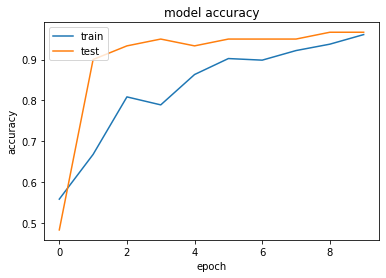

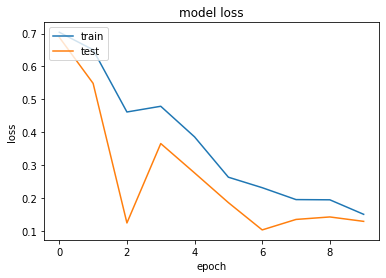

In [74]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# Class Activation Maps
# Grad-CAM 

In [18]:
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Covid','Normal']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


Confusion Matrix
[[30  0]
 [30  0]]
Classification Report
              precision    recall  f1-score   support

       Covid       0.50      1.00      0.67        30
      Normal       0.00      0.00      0.00        30

    accuracy                           0.50        60
   macro avg       0.25      0.50      0.33        60
weighted avg       0.25      0.50      0.33        60



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
